In [1]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_excel("rand_coordinates2.xlsx")
df.head()

,Latitude,Longitude
0,41.123456,42.345678
1,41.987654,43.876543
2,41.234567,42.987654
3,41.876543,43.456789
4,41.654321,42.567890


In [3]:
data = df[['Latitude', 'Longitude']].values

In [11]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df[['Longitude', 'Latitude']])

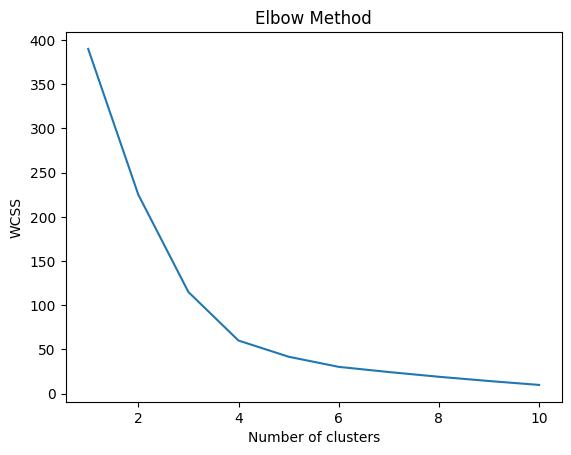

In [12]:
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [13]:
n_clusters=6

In [14]:
kmeans = KMeans(n_clusters, init='k-means++', max_iter=300, n_init=10, random_state=0)
df['cluster'] = kmeans.fit_predict(df_scaled)

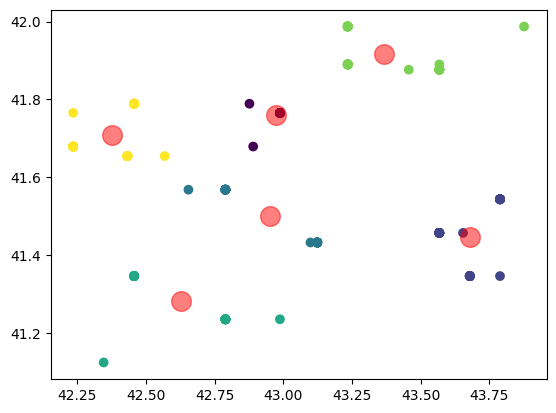

In [15]:
plt.scatter(df['Longitude'], df['Latitude'], c=df['cluster'], cmap='viridis')
centers = scaler.inverse_transform(kmeans.cluster_centers_)
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5)
plt.show()
